# K means 教程

### 0. 引入依赖

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 从sklearn直接生成聚类数据
from sklearn.datasets._samples_generator import make_blobs

### 1. 数据加载

In [33]:
x,y = make_blobs(n_samples=500, n_features=2, centers=6, random_state=1234, cluster_std=0.6)

#   x 取值
#   y 类别 - 由于是unsupervised所以其实y不重要

# plt.figure(figsize=(6,6))
# plt.scatter(x[:,0], x[:,1],c=y)
# plt.show()

### 2. 算法实现

In [37]:
# 引入scipy中的距离函数，默认欧氏距离
from scipy.spatial.distance import cdist 

class K_Means(object):
    #初始化，参数 n_clusters(K), 迭代次数 max_iter, 初始质心 centroids
    def __init__(self, n_clusters=6, max_iter=300, centroids=[]):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids=np.array(centroids, dtype=float)


    #训练模型方法，k-means聚类过程，传入原始数据
    def fit(self,data):
        #假如没有初始质心，就随机选取data中的点作为初始质心
        if self.centroids.shape==(0,):
            ## 从data中随机生成0到data行数的n个整数，作为索引值
            self.centroids=data[ np.random.randint(0, data.shape[0], self.n_clusters), : ]

        for i in range(self.max_iter):
            # 1. 计算距离矩阵
            distances=cdist(data, self.centroids) ## 得到的是一个100*6的矩阵

            # 2. 对距离按照由近到远排序，选取最近的质心点的类别，作为当前点的分类
            c_ind = np.argmin(distances,axis=1) ## 得到的是一个100*1的一列

            # 3. 对每一类数据进行均值计算，更新质心点坐标
            for i in range(self.n_clusters):
                #排除掉没有出现在c_ind里的类别
                if i in c_ind:
                    # 选出所有类别是i的点，取data里面坐标的均值，更新第i个质心
                    self.centroids[i]=np.mean(data[c_ind==i], axis=0) ##你需要的是一行，所以axis=0
                    
    #实现预测方法
    def predict(self, samples):
        # 跟上面一样，先计算距离矩阵，然后选取距离最近的那个质心类别
        distances = cdist(samples, self.centroids)
        c_ind = np.argmin(distances, axis=1) ##需要的是一列，多以axis=1

        return c_ind

### 3. 测试

[1 5]


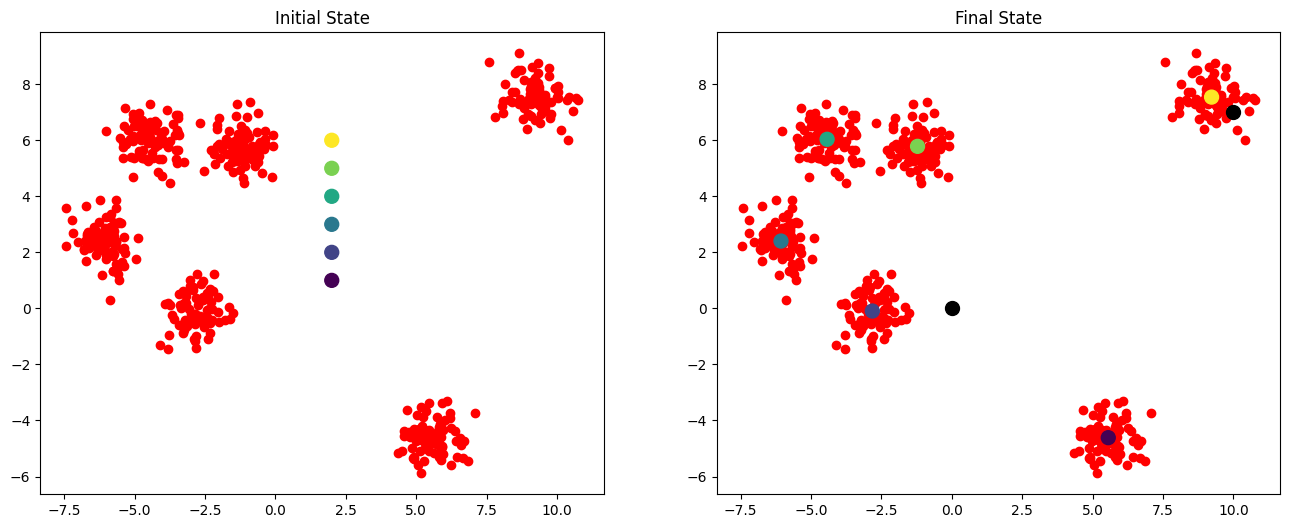

In [43]:
#定义一个绘制子图的函数
def plotKMeans(x,y,centroids, subplot,title):
    #分配子图,121表示一行两列子图中的第一个
    plt.subplot(subplot)
    plt.scatter(x[:,0],x[:,1],c="r")
    #画出质心点
    plt.scatter(centroids[:,0], centroids[:,1], c=np.array(range(6)), s=100)
    plt.title(title)

kmeans=K_Means(max_iter=300, centroids=np.array([[2,1], [2,2],[2,3],[2,4],[2,5],[2,6]]))

plt.figure(figsize=(16,6))
plotKMeans(x,y,kmeans.centroids,121,'Initial State')

#开始聚类
kmeans.fit(x)
plotKMeans(x,y,kmeans.centroids,122,'Final State')

# 预测新数据点的类别

x_new = np.array([[0,0],[10,7]])
y_pred = kmeans.predict(x_new)

print(y_pred)

plt.scatter(x_new[:,0],x_new[:,1],s=100,c='black')
